In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
from google.colab import drive
drive.mount('/content/drive/')
data_path = "/content/drive/MyDrive/Machine Learning Group Project/"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [14]:
file_path = data_path + 'preprocessed_data.csv'
df = pd.read_csv(file_path)
df = df.drop(['CLASS'], axis=1)
df

Gender   AGE  Urea  Cr  HbA1c  Chol   TG   HDL  LDL  VLDL   BMI  \
0        0.0  50.0   4.7  46    4.9   4.2  0.9  2.15  1.4   0.5  24.0   
1        1.0  35.5   4.5  62    4.9   3.7  1.4  1.10  2.1   0.6  23.0   
2        1.0  35.5   7.1  46    4.9   4.9  1.0  0.80  2.0   0.4  21.0   
3        0.0  45.0   2.3  24    4.0   2.9  1.0  1.00  1.5   0.4  21.0   
4        0.0  50.0   2.0  50    4.0   3.6  1.3  0.90  2.1   0.6  24.0   
...      ...   ...   ...  ..    ...   ...  ...   ...  ...   ...   ...   
1016     0.0  56.0   5.6  84    6.2   5.2  2.1  1.10  2.8   0.9  26.0   
1017     1.0  47.0   5.1  78    6.1   5.1  2.0  1.10  2.7   0.9  25.0   
1018     0.0  45.0   4.9  76    5.9   4.9  1.8  1.20  2.6   0.8  24.0   
1019     0.0  52.0   5.3  82    6.1   5.1  2.0  1.10  2.8   0.9  25.0   
1020     0.0  64.0   6.6  94    7.0   5.9  2.8  1.10  3.6   1.3  29.0   

      CLASS_encoded  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
1016              1  
1017              1  
1018              1  
1019              1  
1020              1  

[1021 rows x 12 columns]

*   **CLASS 'N' --> CLASS_encoded '0'**
*   **CLASS 'P' --> CLASS_encoded '1'**
*   **CLASS 'Y' --> CLASS_encoded '2'**




#**Features Distribution**

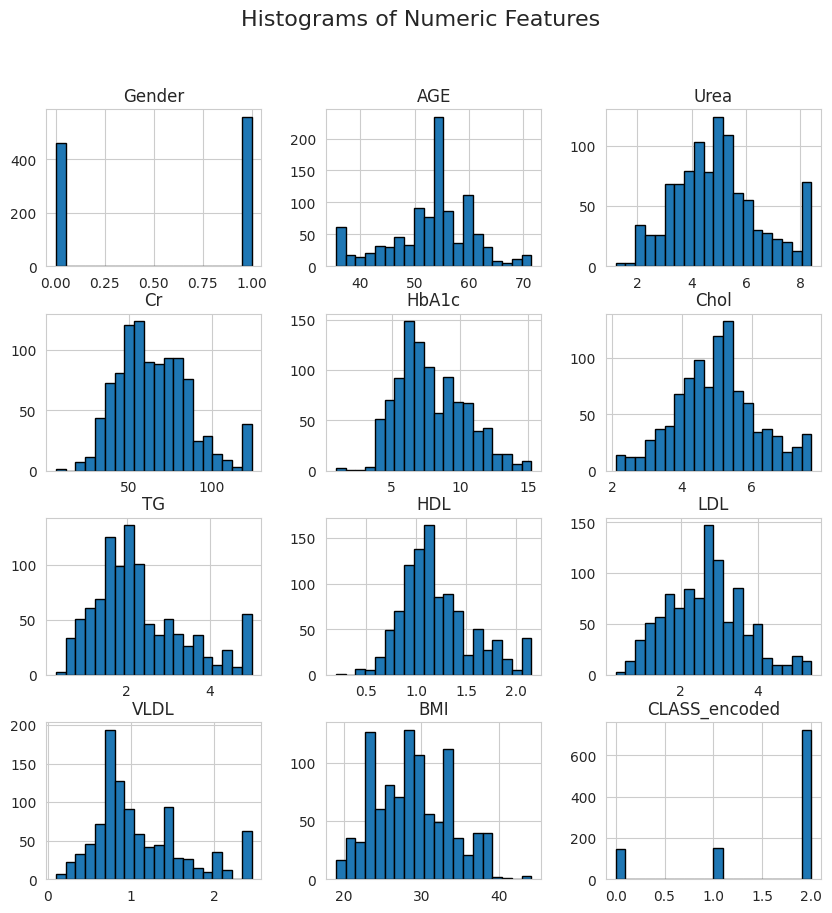

In [15]:
sns.set_style("whitegrid")

# 1. Histogram for all numeric columns
df.hist(figsize=(10, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()

#**Diagnostic Results Distribution**

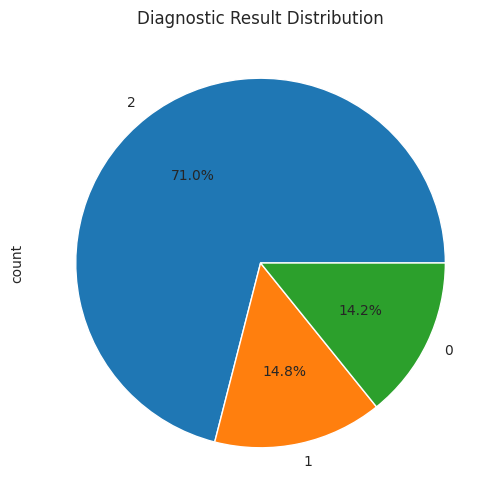

In [16]:
plt.figure(figsize=(6, 6))
df["CLASS_encoded"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Diagnostic Result Distribution")
plt.show()

#**Outlier Distribution**

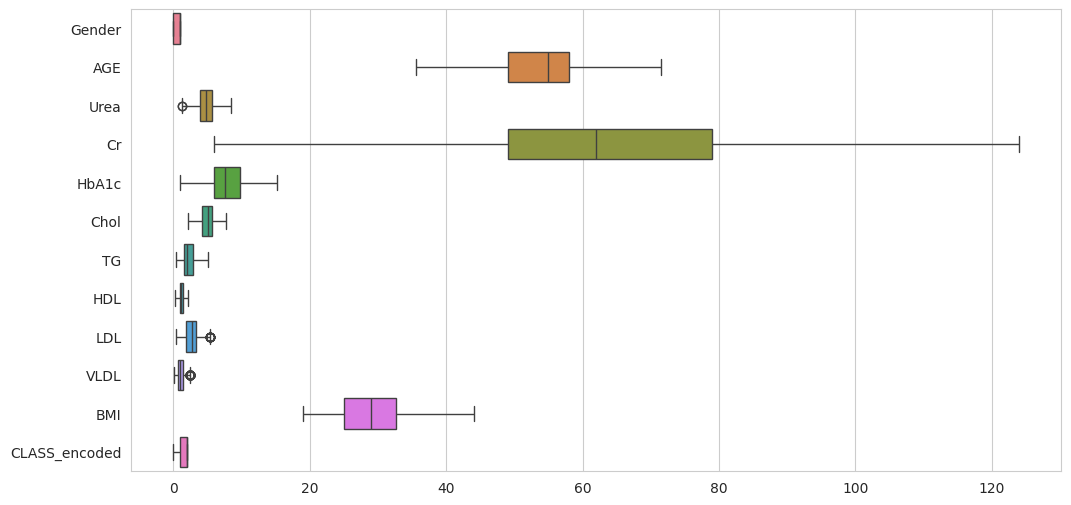

In [17]:
#df = df.drop(['CLASS_encoded'], axis=1).copy()
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h")
plt.show()

#**Reference for Normal range value of each metrics**


*   HbA1c: < 5.7%
*   Cr: 44 - 133umol/L
*   Chol: < 5.2 mmol/L
*   Urea: 2.5 – 7.8 mmol/L
*   TG: < 1.7 mmol/L
*   HDL: > 1.0 mmol/L(Male) / > 1.3 mmol/L(Female)
*   LDL: < 2.6 mmol/L
*   VLDL: 0.13 – 1.04 mmol/L
*   BMI: 18.5 – 24.9

#**Correlation Matrix Plot**

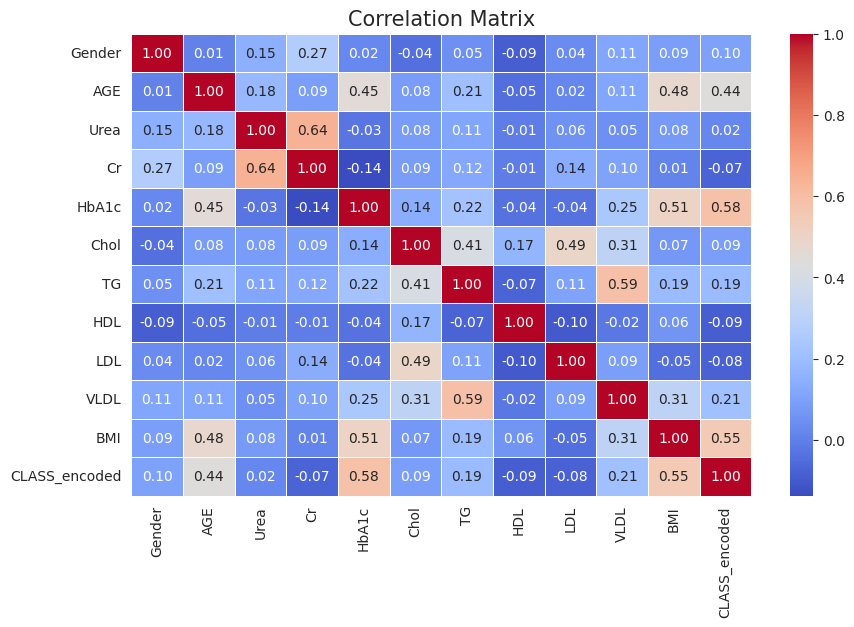

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix', fontsize=15)
plt.show()

#**Scatterplot of variable Relationship (e.g, Cr vs Urea)**

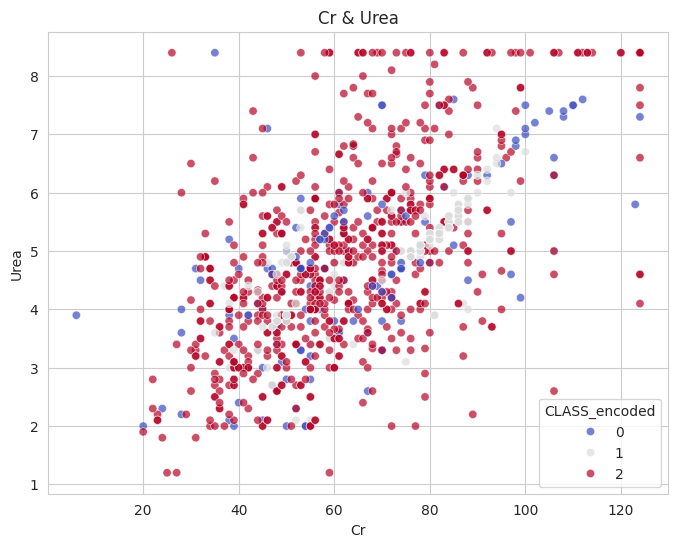

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Cr"], y=df["Urea"], hue=df["CLASS_encoded"], palette="coolwarm", alpha=0.7)
plt.xlabel("Cr")
plt.ylabel("Urea")
plt.title("Cr & Urea")
plt.show()

#**Scatter and Density Plot**

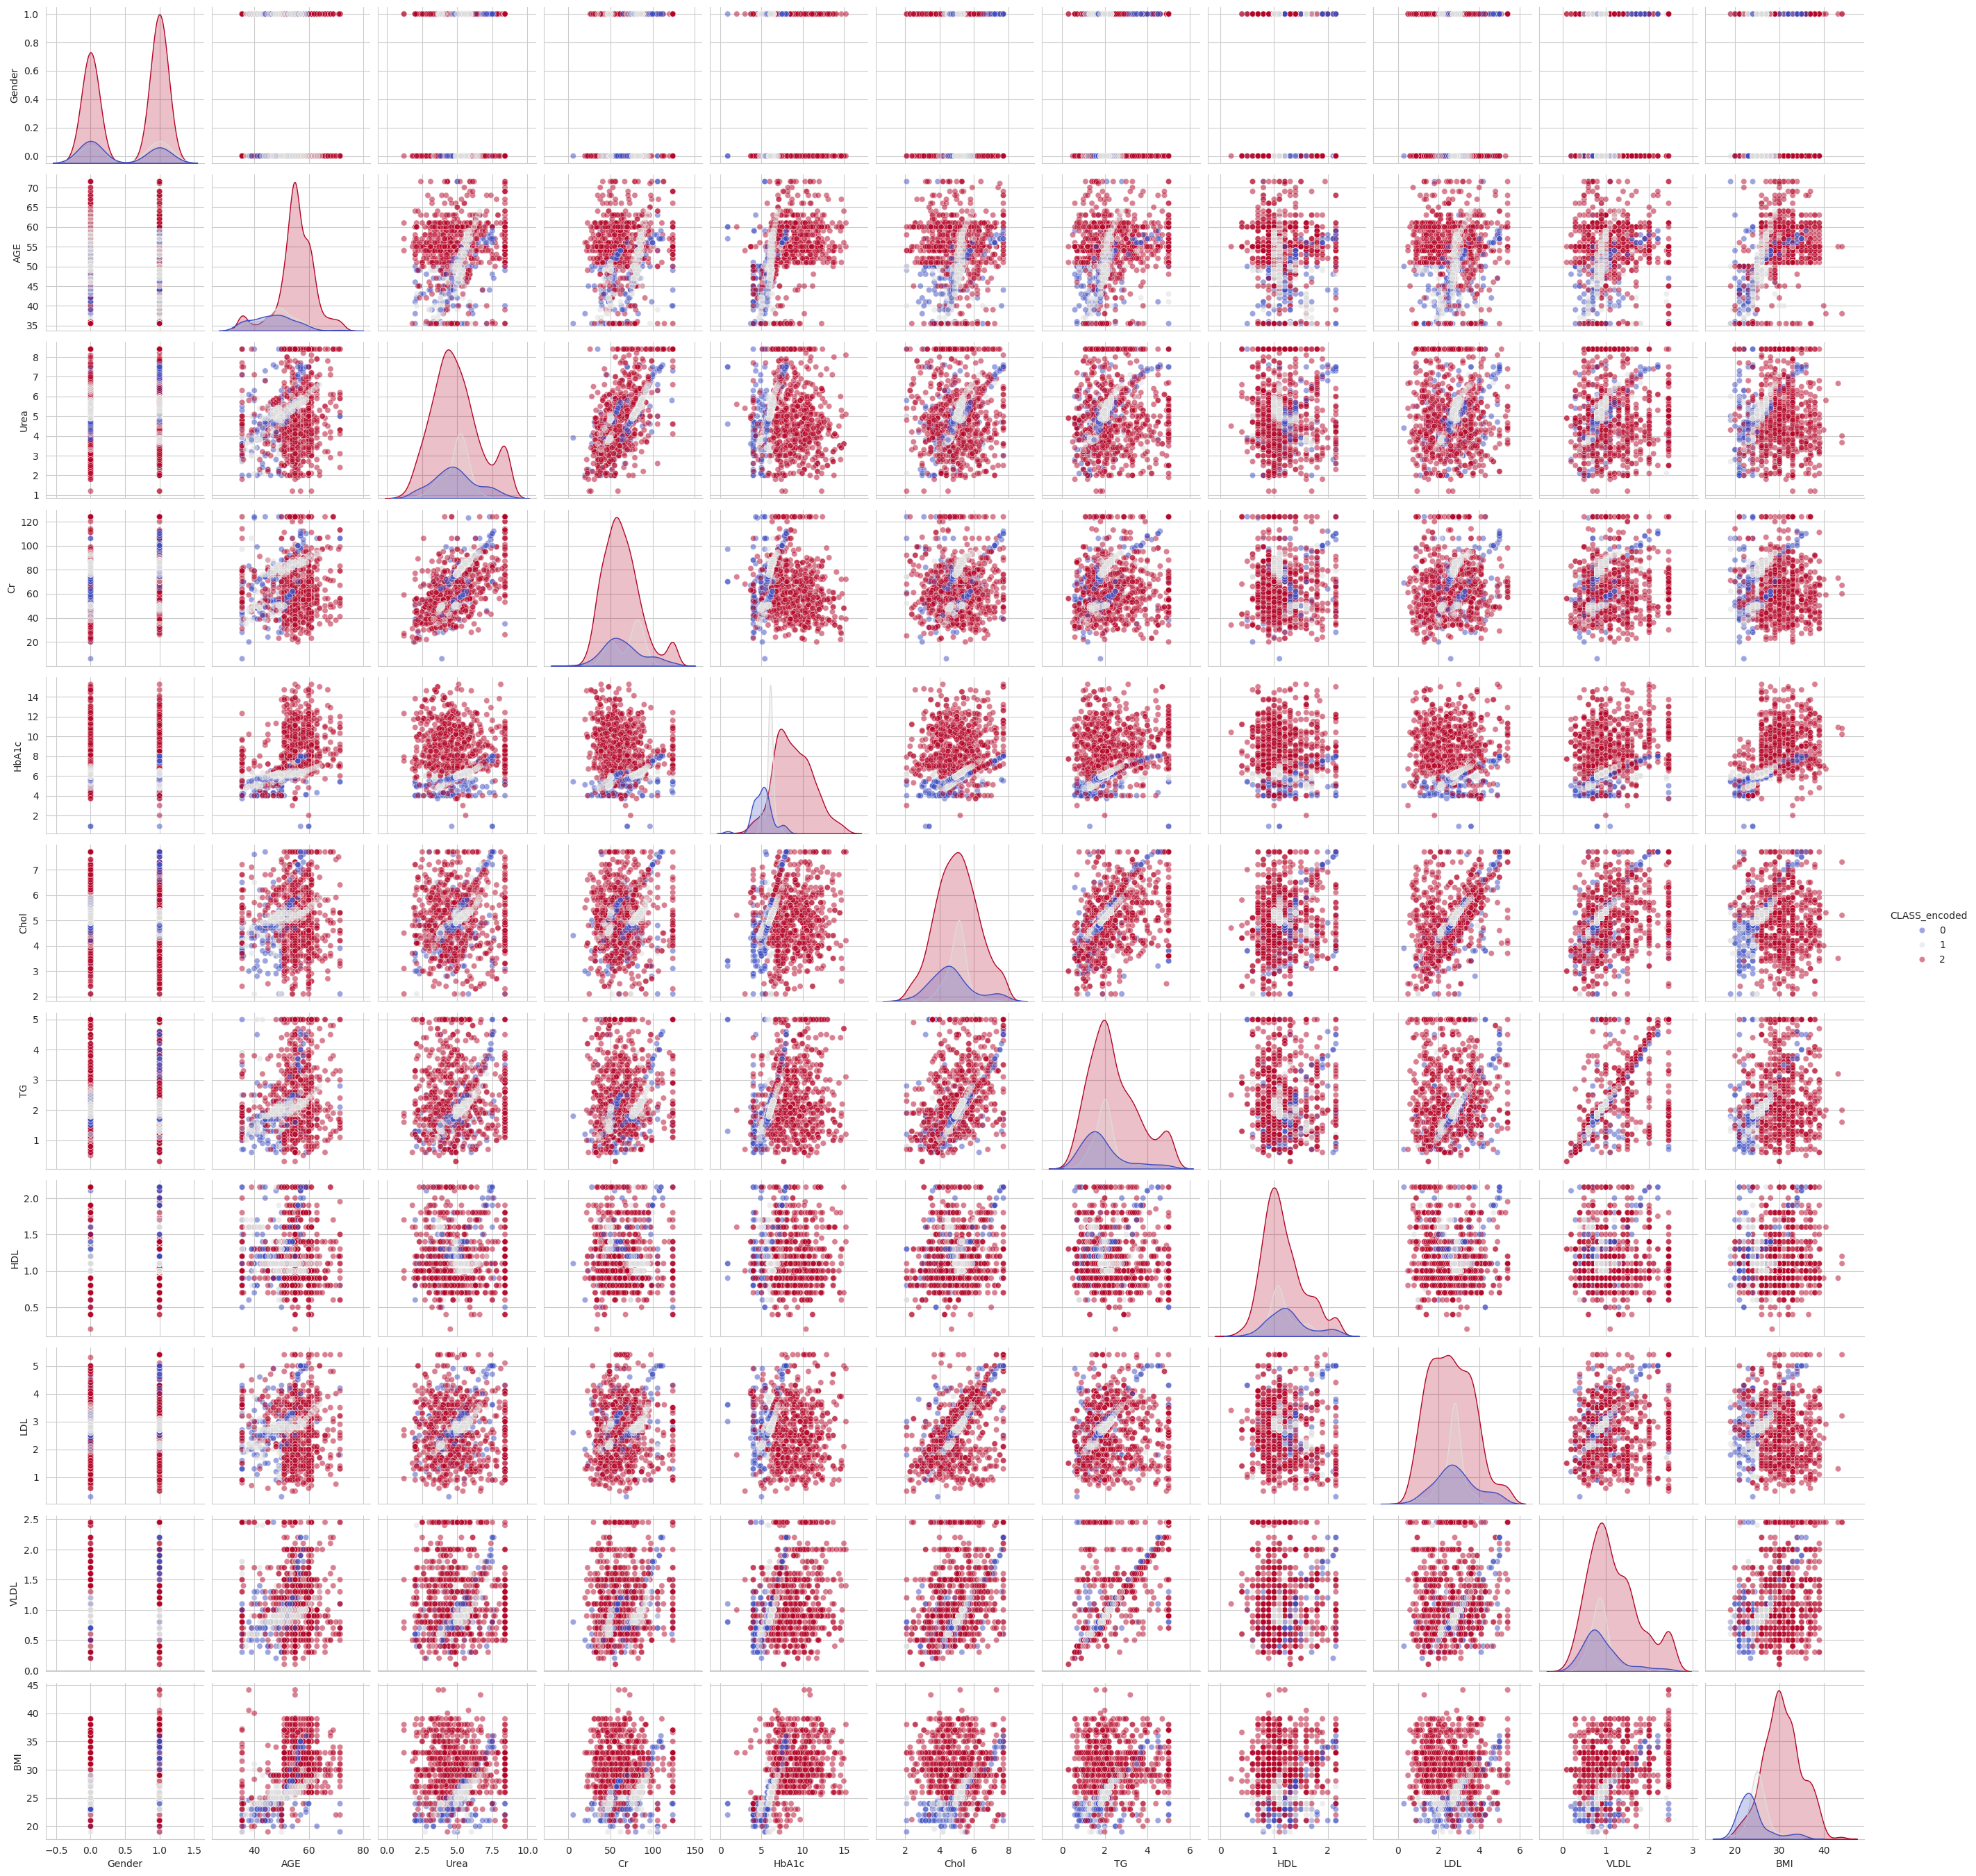

In [20]:
sns.pairplot(df, hue='CLASS_encoded', diag_kind="kde", palette="coolwarm", plot_kws={'alpha': 0.5})
plt.show()

In [21]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

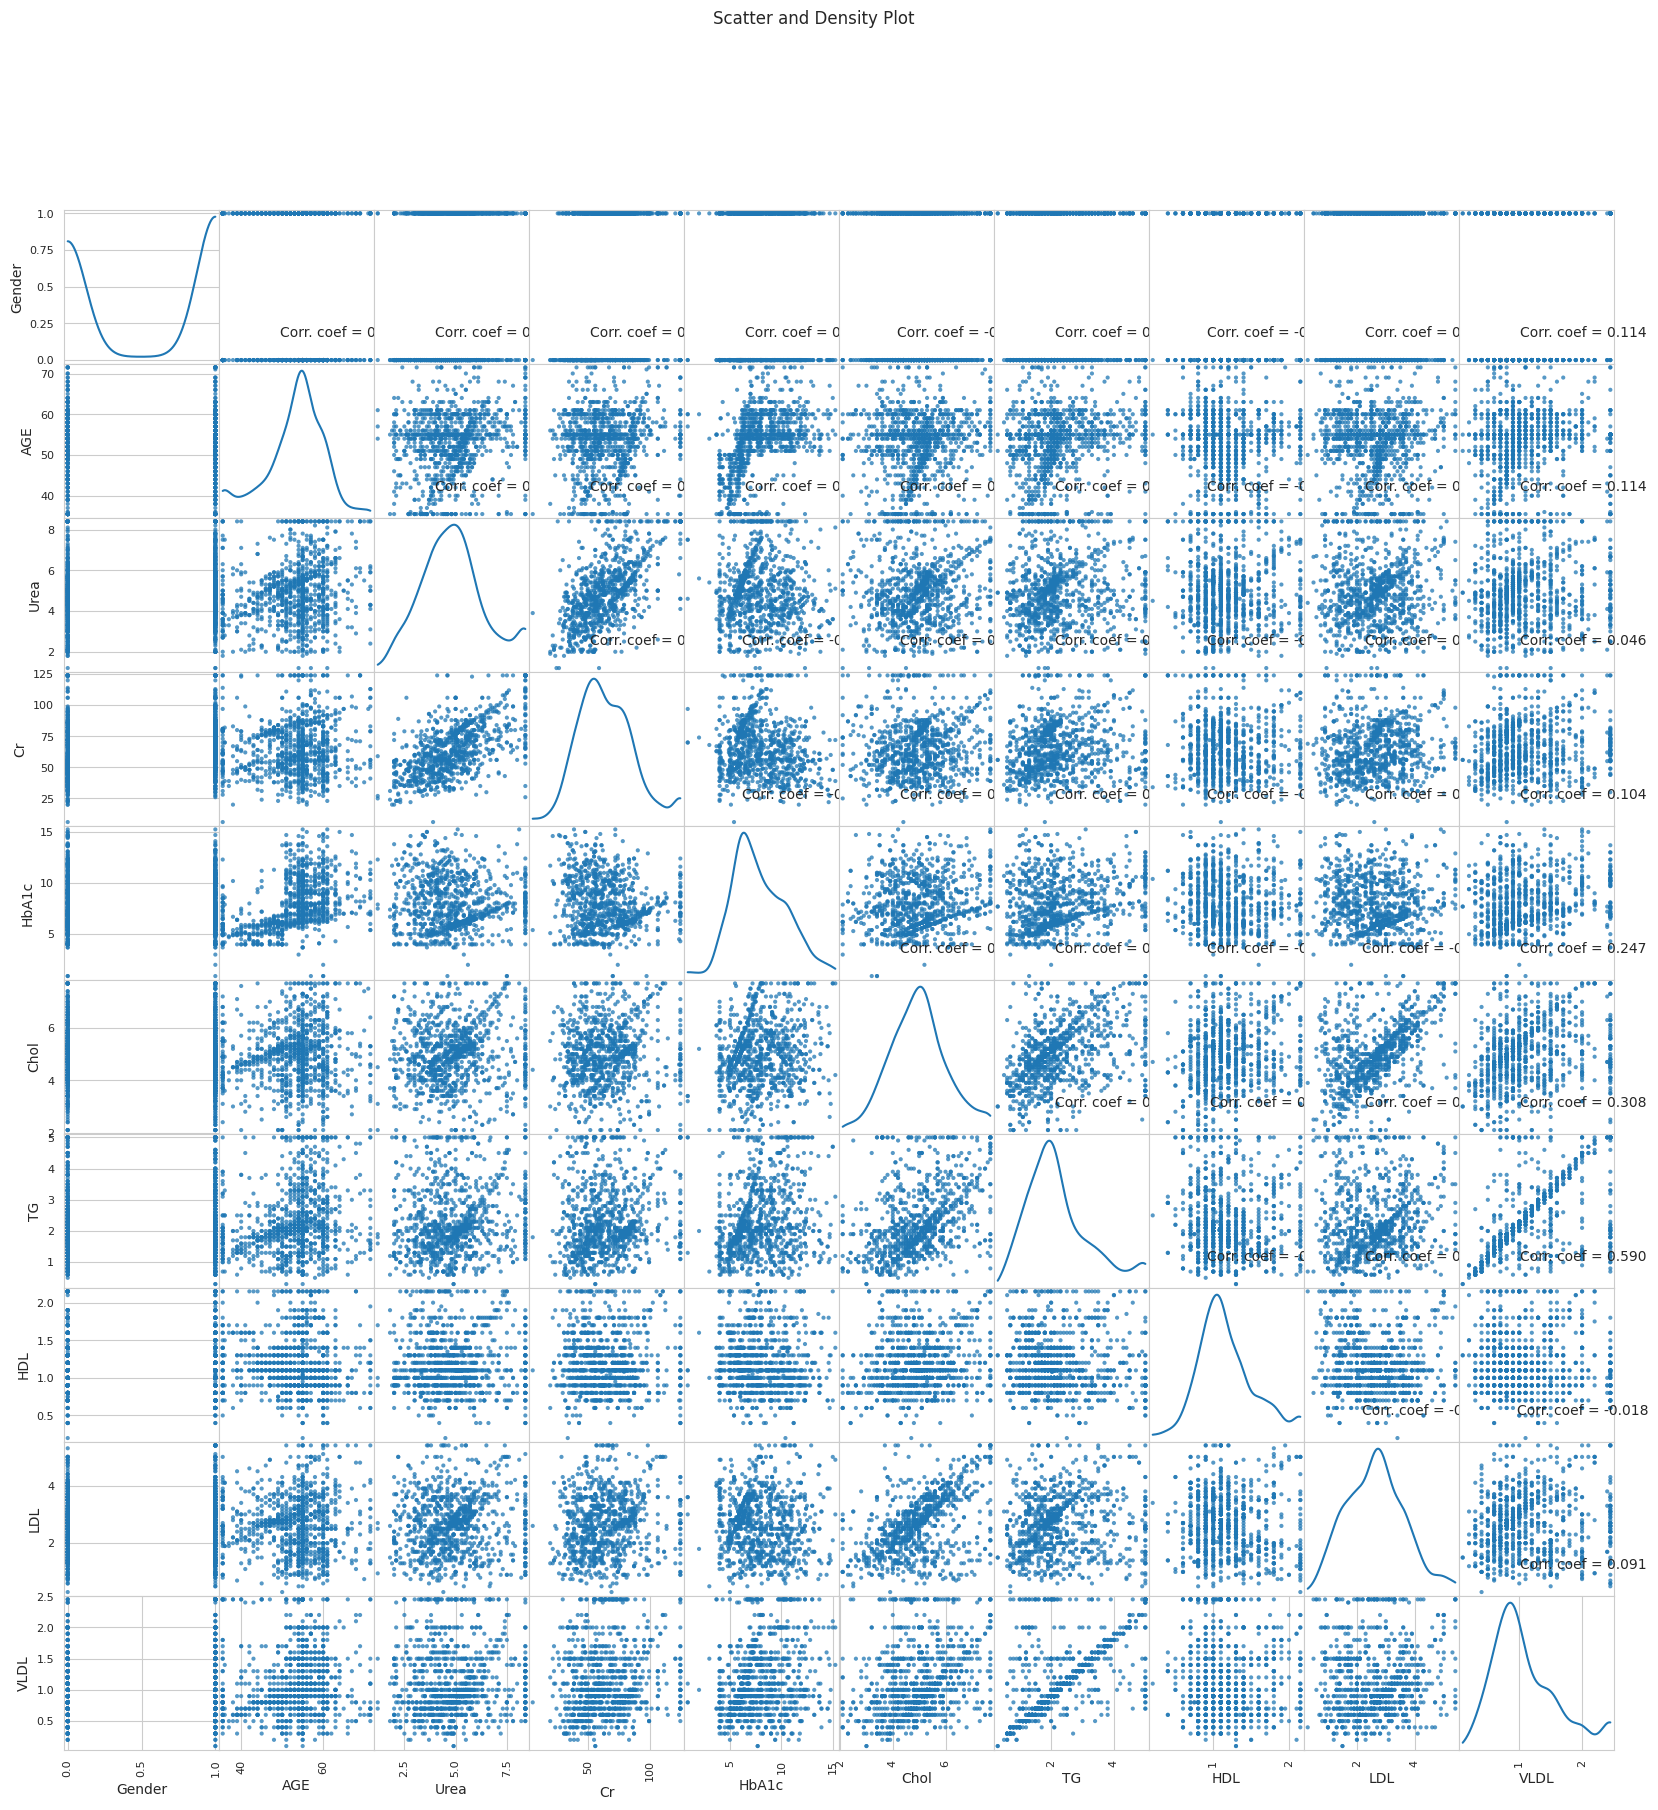

In [22]:
plotScatterMatrix(df, 20, 10)